<a href="https://colab.research.google.com/github/Graceyujung/ML/blob/main/Grace_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering on Marketing Campaign Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('marketing_campaign.csv')

In [3]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


### Data Preprocessing

In [4]:
data.shape

(2240, 29)

In [5]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [6]:
data[data['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


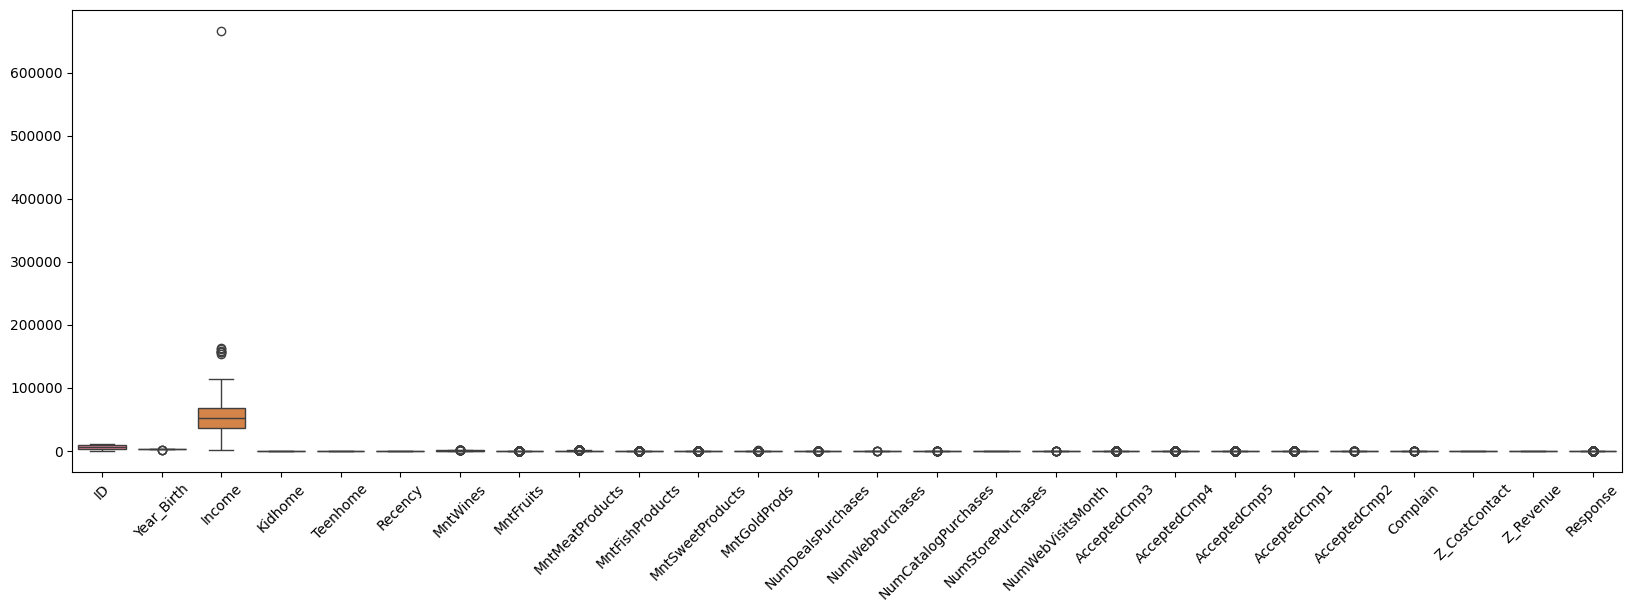

In [7]:
plt.figure(figsize=(20,6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

The missing values are random and ouliers exist, so meidan imputation is performed.

In [8]:
data['Income'] = data['Income'].fillna(data['Income'].median())

In [9]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [10]:
data.drop("Dt_Customer", axis=1, inplace=True)

In [11]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,16,520,42,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,34,235,65,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,32,76,10,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,19,14,0,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,68,28,0,...,20,1,0,0,0,0,0,3,11,0


In [12]:
data.shape

(2240, 28)

### Handling Outliers

In [13]:
data.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64


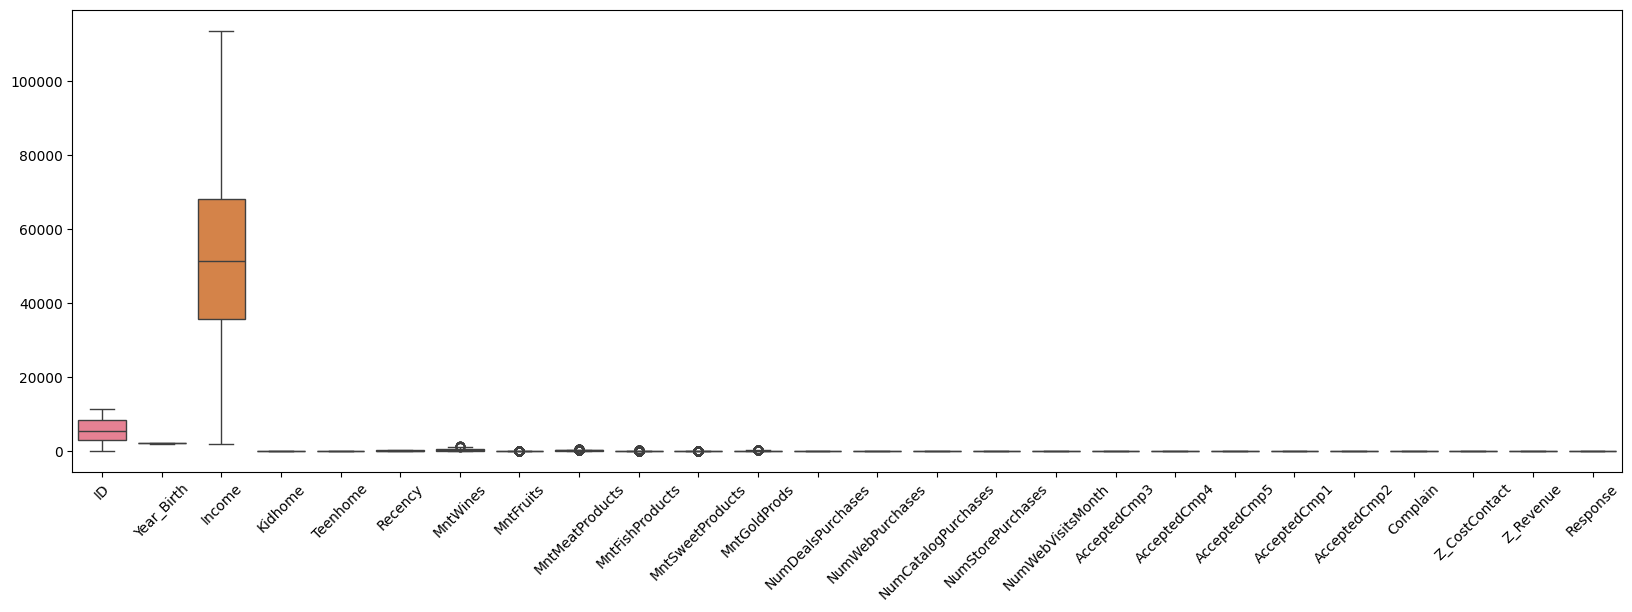

In [16]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

    data[column] = data[column].mask(outliers, data[column].median())

# Check the cleaned data
plt.figure(figsize=(20,6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

### Categorical Encoding

In [19]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [20]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

### 'Education' Ordinal Encoding

In [21]:
from sklearn.preprocessing import OrdinalEncoder

education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

ordinal_encoder = OrdinalEncoder(categories=[education_order])
data['Education'] = ordinal_encoder.fit_transform(data[['Education']])

data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2.0,Single,58138.0,0,0,58,635.0,8,...,7,0,0,0,0,0,0,3,11,0
1,2174,1954,2.0,Single,46344.0,1,1,38,11.0,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2.0,Together,71613.0,0,0,26,426.0,8,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2.0,Together,26646.0,1,0,26,11.0,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4.0,Married,58293.0,1,0,94,173.0,43,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,3.0,Together,62513.0,0,1,16,520.0,42,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,2.0,Divorced,55635.0,0,1,34,235.0,8,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,4.0,Married,33454.0,1,0,32,76.0,10,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,4.0,Together,30351.0,1,0,19,14.0,0,...,9,0,0,0,0,0,0,3,11,0
9,5899,1950,4.0,Together,5648.0,1,1,68,28.0,0,...,6,0,0,0,0,0,0,3,11,0


### 'Marital_Status' Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Marital_Status'] = le.fit_transform(data['Marital_Status'])

data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2.0,4,58138.0,0,0,58,635.0,8,...,7,0,0,0,0,0,0,3,11,0
1,2174,1954,2.0,4,46344.0,1,1,38,11.0,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2.0,5,71613.0,0,0,26,426.0,8,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2.0,5,26646.0,1,0,26,11.0,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4.0,3,58293.0,1,0,94,173.0,43,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,3.0,5,62513.0,0,1,16,520.0,42,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,2.0,2,55635.0,0,1,34,235.0,8,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,4.0,3,33454.0,1,0,32,76.0,10,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,4.0,5,30351.0,1,0,19,14.0,0,...,9,0,0,0,0,0,0,3,11,0
9,5899,1950,4.0,5,5648.0,1,1,68,28.0,0,...,6,0,0,0,0,0,0,3,11,0


### Feature Scaling

In [23]:
from sklearn.preprocessing import RobustScaler

# Used RobustScaler for outliers
scaler = RobustScaler()
df = data.copy()
df = scaler.fit_transform(data)
df

array([[ 0.01169747, -0.72222222,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.58657023, -0.88888889,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.23528887, -0.27777778,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.32351103,  0.61111111,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49584784, -0.77777778,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70479507, -0.88888889,  2.        , ...,  0.        ,
         0.        ,  0.        ]])

### KMeans (Elbow Method)

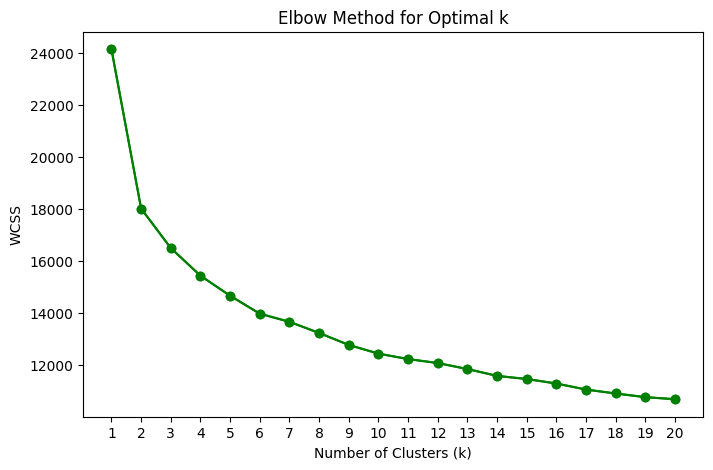

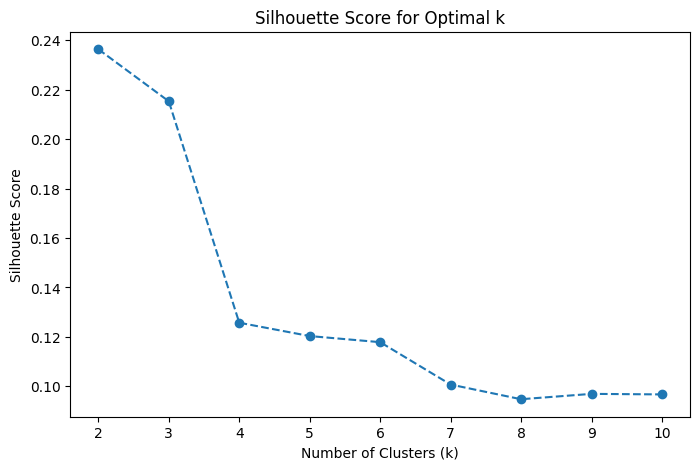

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

WCSS = []
silhouette_scores = []
wcss_range = range(1, 21)  # WCSS range (including k=1)
silhouette_range = range(2, 11)  # Silhouette Score range (starting from k=2)

for k in wcss_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)

for k in silhouette_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

# Plot WCSS (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(wcss_range, WCSS, marker='o', linestyle='-', color='g')
plt.xticks(np.arange(1, 21))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(silhouette_range, silhouette_scores, marker='o', linestyle='dashed')
plt.xticks(np.arange(2, 11))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


- From the elbow method, there's an elbow at k=2 and k=3, and WCSS decreased significantly. Then, the curve is stable where the difference in WCSS is very less.

- From silhoutette score, k=2 gives higher silhouette score.

In [25]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
data["cluster"] = kmeans.fit_predict(df)

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
0,5524,1957,2.0,4,58138.0,0,0,58,635.0,8,...,0,0,0,0,0,0,3,11,0,3
1,2174,1954,2.0,4,46344.0,1,1,38,11.0,1,...,0,0,0,0,0,0,3,11,0,0
2,4141,1965,2.0,5,71613.0,0,0,26,426.0,8,...,0,0,0,0,0,0,3,11,0,3
3,6182,1984,2.0,5,26646.0,1,0,26,11.0,4,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,4.0,3,58293.0,1,0,94,173.0,43,...,0,0,0,0,0,0,3,11,0,2


In [26]:
data.to_csv("clustered_marketing_campaign.csv", index=False)

### KMedoids (Elbow Method)

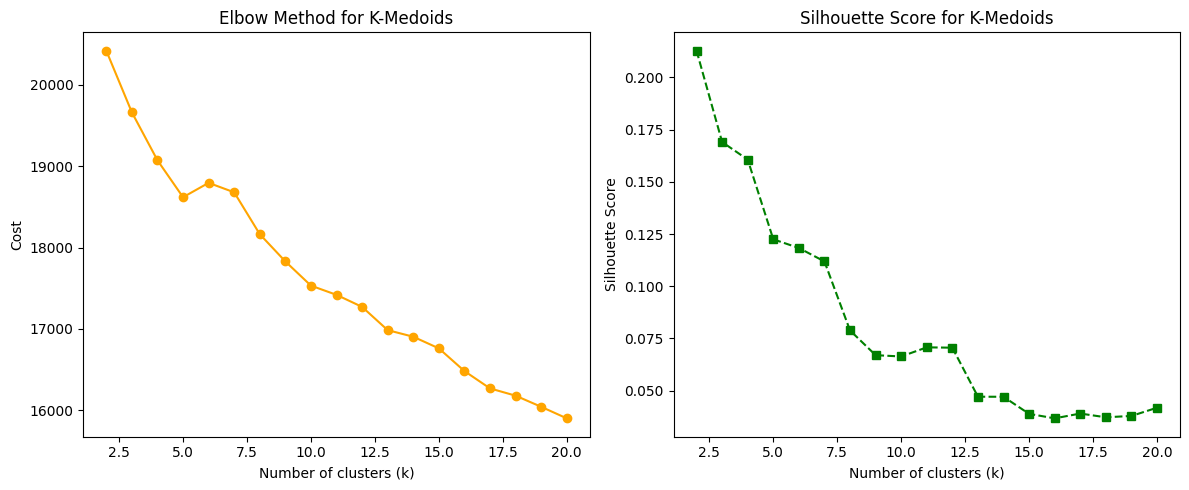

In [33]:
from sklearn_extra.cluster import KMedoids

k_values = range(2, 21) # k starts from 2 since we don't want only 1 cluster
costs = []
silhouette_scores = []

for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric="manhattan", init='k-medoids++')
    kmedoids.fit(df)
    cluster_labels = kmedoids.predict(df)
    costs.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(df, cluster_labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, costs, marker="o", linestyle="-", color="orange")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Cost")
plt.title("Elbow Method for K-Medoids")

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker="s", linestyle="--", color="g")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K-Medoids")

plt.tight_layout()
plt.show()


### DBSCAN